In [ ]:
import tkinter as tk
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import time


# initialize mediapipe
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('mp_hand_gesture')

# Load class names
f = open('gesture.names', 'r')
classNames = f.read().split('\n')
f.close()
print(classNames)

# Create a VideoCapture object to capture frames from the camera
cap = cv2.VideoCapture(0)

# Initialize the MediaPipe Hand model
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Initialize the drawing module
mp_drawing = mp.solutions.drawing_utils

# Define a function to run the hand gesture detection model
def detect_gestures():
    while True:
        # Read each frame from the webcam
        _, frame = cap.read()

        x, y, c = frame.shape

        # Flip the frame horizontally
        frame = cv2.flip(frame, 1)
        framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Get hand landmark prediction
        result = hands.process(framergb)

        # print(result)
    
        className = ''

        # post process the result
        if result.multi_hand_landmarks:
            landmarks = []
            for handslms in result.multi_hand_landmarks:
                for lm in handslms.landmark:
                    # print(id, lm)
                    lmx = int(lm.x * x)
                    lmy = int(lm.y * y)

                    landmarks.append([lmx, lmy])

                # Drawing landmarks on frames
                mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

                # Predict gesture
                prediction = model.predict([landmarks])
                # print(prediction)
                classID = np.argmax(prediction)
                className = classNames[classID]
                print(className)
#                 arduino.write(classID)
#                 time.sleep(0.05)

        # show the prediction on the frame
        cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

        # Show the final output
        cv2.imshow("Output", frame) 

        if cv2.waitKey(1) == ord('q'):
            break

    # release the webcam and destroy all active windows
    cap.release()

    cv2.destroyAllWindows()

# Define a function to start the hand gesture detection when the user clicks a button
def start_detection():
    detect_gestures()

# Create a window using Tkinter
root = tk.Tk()
root.title("Hand Gesture Detection")

# Create a button labeled "Start" and bind it to the start_detection function
start_button = tk.Button(root, text="Start", command=start_detection)
start_button.pack(pady=20)

# Run the main event loop
root.mainloop()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
2023-04-11 17:18:37.927308: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


['okay', 'peace', 'thumbs up', 'thumbs down', 'call me', 'stop', 'rock', 'live long', 'fist', 'smile']
1/1 [==============================] - 0s 138ms/step
live long
1/1 [==============================] - 0s 16ms/step
live long
1/1 [==============================] - 0s 54ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 16ms/step
live long
1/1 [==============================] - 0s 16ms/step
live long
1/1 [==============================] - 0s 16ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [=======================

In [ ]:
# Capture a frame from the camera
        success, frame = cap.read()
        if not success:
            break

        # Convert the frame to RGB and process it with the MediaPipe Hand model
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(frame)

        # Draw the hand landmarks and connections on the frame
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # Display the frame in a window
        cv2.imshow('Hand Gestures', frame)

        # Break the loop if the user presses the 'q' key
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the VideoCapture object and close the window
    cap.release()
    cv2.destroyAllWindows()

# Works:

In [1]:
import tkinter as tk
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import time


# initialize mediapipe
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('mp_hand_gesture')

# Load class names
f = open('gesture.names', 'r')
classNames = f.read().split('\n')
f.close()
print(classNames)

# Create a VideoCapture object to capture frames from the camera
cap = cv2.VideoCapture(0)

# Initialize the MediaPipe Hand model
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Initialize the drawing module
mp_drawing = mp.solutions.drawing_utils

# Define a function to run the hand gesture detection model
def detect_gestures():
    while True:
        # Read each frame from the webcam
        _, frame = cap.read()

        x, y, c = frame.shape

        # Flip the frame horizontally
        frame = cv2.flip(frame, 1)
        framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Get hand landmark prediction
        result = hands.process(framergb)

        # print(result)
    
        className = ''

        # post process the result
        if result.multi_hand_landmarks:
            landmarks = []
            for handslms in result.multi_hand_landmarks:
                for lm in handslms.landmark:
                    # print(id, lm)
                    lmx = int(lm.x * x)
                    lmy = int(lm.y * y)

                    landmarks.append([lmx, lmy])

                # Drawing landmarks on frames
                mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

                # Predict gesture
                prediction = model.predict([landmarks])
                # print(prediction)
                classID = np.argmax(prediction)
                className = classNames[classID]
                print(className)
#                 arduino.write(classID)
#                 time.sleep(0.05)

        # show the prediction on the frame
        cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

        # Show the final output
        cv2.imshow("Output", frame) 

        if cv2.waitKey(1) == ord('q'):
            break

    # release the webcam and destroy all active windows
    cap.release()

    cv2.destroyAllWindows()

# Define a function to start the hand gesture detection when the user clicks a button
def start_detection():
    detect_gestures()

# Create main window
root = tk.Tk()
root.title("Hand Gesture Detection")
root.geometry("300x200")

# Create label for messages
label = tk.Label(root, text="Click the button to detect hand gesture", wraplength=250)
label.pack(pady=20)

# Create button for hand gesture detection
button = tk.Button(root, text="Detect Hand Gesture", command=detect_gestures)
button.pack(pady=10)

# Center the button in the window
root.update_idletasks()
button_width = button.winfo_width()
button_height = button.winfo_height()
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x = (screen_width // 2) - (button_width // 2)
y = (screen_height // 2) - (button_height // 2)
root.geometry(f"+{x}+{y}")

# Start the Tkinter event loop
root.mainloop()


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
2023-04-11 17:24:05.767861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


['okay', 'peace', 'thumbs up', 'thumbs down', 'call me', 'stop', 'rock', 'live long', 'fist', 'smile']


2023-04-11 17:24:22.985 python[19155:1288321] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (3.08 secs).


1/1 [==============================] - 0s 66ms/step
rock
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 17ms/step
peace
1/1 [==============================] - 0s 16ms/step
peace
1/1 [==============================] - 0s 17ms/step
peace
1/1 [==============================] - 0s 16ms/step
peace
1/1 [==============================] - 0s 16ms/step
peace
1/1 [==============================] - 0s 17ms/step
peace
1/1 [==============================] - 0s 17ms/step
peace
1/1 [==============================] - 0s 17ms/step
fist
1/1 [==============================] - 0s 17ms

# Adding some UI features:

In [ ]:
import tkinter as tk
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import time
from serial import Serial

arduino = Serial(port='/dev/tty.usbserial-A50285BI', baudrate=9600, timeout=.1)

# initialize mediapipe
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('mp_hand_gesture')

# Load class names
f = open('gesture.names', 'r')
classNames = f.read().split('\n')
f.close()
print(classNames)

# Create a VideoCapture object to capture frames from the camera
cap = cv2.VideoCapture(0)

# Initialize the MediaPipe Hand model
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Initialize the drawing module
mp_drawing = mp.solutions.drawing_utils

# Define a function to run the hand gesture detection model
def detect_gestures():
    while True:
        # Read each frame from the webcam
        _, frame = cap.read()

        x, y, c = frame.shape

        # Flip the frame horizontally
        frame = cv2.flip(frame, 1)
        framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Get hand landmark prediction
        result = hands.process(framergb)

        # print(result)
    
        className = ''

        # post process the result
        if result.multi_hand_landmarks:
            landmarks = []
            for handslms in result.multi_hand_landmarks:
                for lm in handslms.landmark:
                    # print(id, lm)
                    lmx = int(lm.x * x)
                    lmy = int(lm.y * y)

                    landmarks.append([lmx, lmy])

                # Drawing landmarks on frames
                mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

                # Predict gesture
                prediction = model.predict([landmarks])
                # print(prediction)
                classID = np.argmax(prediction)
                className = classNames[classID]
                print(className)
                arduino.write(classID)

        # show the prediction on the frame
        cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

        # Show the final output
        cv2.imshow("Output", frame) 

        if cv2.waitKey(1) == ord('q'):
            break

    # release the webcam and destroy all active windows
    cap.release()

    cv2.destroyAllWindows()

# Define a function to start the hand gesture detection when the user clicks a button
def start_detection():
    detect_gestures()

# Create main window
root = tk.Tk()
root.title("Hand Gesture Detection")
root.geometry("500x300")

# Create label for messages
label = tk.Label(root, text="Click the button to detect hand gesture | Click Q to stop", wraplength=250)
label.pack(pady=20)

# Create button for hand gesture detection
button = tk.Button(root, text="Detect Hand Gesture", command=detect_gestures)
button.pack(pady=10)

# Center the button in the window
root.update_idletasks()
button_width = button.winfo_width()
button_height = button.winfo_height()
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x = (screen_width // 2) - (button_width // 2)
y = (screen_height // 2) - (button_height // 2)
root.geometry(f"+{x}+{y}")

# Set window icon
root.iconbitmap('icon.ico') # Replace 'icon.ico' with your icon file path

# Add tooltip to the button
button_tooltip = "Click to detect hand gesture"
button.bind('<Enter>', lambda event: label.config(text=button_tooltip))
button.bind('<Leave>', lambda event: label.config(text="Click the button to detect hand gesture"))

# Add shortcut key for the button
root.bind('<Return>', lambda event: detect_gestures())

# Start the Tkinter event loop
root.mainloop()

['okay', 'peace', 'thumbs up', 'thumbs down', 'call me', 'stop', 'rock', 'live long', 'fist', 'smile']
1/1 [==============================] - 0s 70ms/step
fist
1/1 [==============================] - 0s 17ms/step
live long
1/1 [==============================] - 0s 24ms/step
live long
1/1 [==============================] - 0s 20ms/step
live long
1/1 [==============================] - 0s 18ms/step
live long
1/1 [==============================] - 0s 18ms/step
live long
1/1 [==============================] - 0s 18ms/step
live long
1/1 [==============================] - 0s 22ms/step
live long
1/1 [==============================] - 0s 19ms/step
live long
1/1 [==============================] - 0s 18ms/step
live long
1/1 [==============================] - 0s 22ms/step
live long
1/1 [==============================] - 0s 20ms/step
live long
1/1 [==============================] - 0s 18ms/step
live long
1/1 [==============================] - 0s 22ms/step
live long
1/1 [=============================

Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/envs/env_tensorflow/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/ct/83j70b6n0xn__16hfxpffk4m0000gn/T/ipykernel_34612/2715090866.py", line 73, in detect_gestures
    className = classNames[classID]
IndexError: list index out of range


# UI testing:

In [1]:
import tkinter as tk
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import time


# initialize mediapipe
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('mp_hand_gesture')

# Load class names
f = open('gesture.names', 'r')
classNames = f.read().split('\n')
f.close()
print(classNames)

# Create a VideoCapture object to capture frames from the camera
cap = cv2.VideoCapture(0)

# Initialize the MediaPipe Hand model
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Initialize the drawing module
mp_drawing = mp.solutions.drawing_utils

# Define a function to run the hand gesture detection model
def detect_gestures():
    label.config(text="Hand gesture system activated")
    while True:
        # Read each frame from the webcam
        _, frame = cap.read()

        x, y, c = frame.shape

        # Flip the frame horizontally
        frame = cv2.flip(frame, 1)
        framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Get hand landmark prediction
        result = hands.process(framergb)

        # print(result)
    
        className = ''

        # post process the result
        if result.multi_hand_landmarks:
            landmarks = []
            for handslms in result.multi_hand_landmarks:
                for lm in handslms.landmark:
                    # print(id, lm)
                    lmx = int(lm.x * x)
                    lmy = int(lm.y * y)

                    landmarks.append([lmx, lmy])

                # Drawing landmarks on frames
                mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

                # Predict gesture
                prediction = model.predict([landmarks])
                # print(prediction)
                classID = np.argmax(prediction)
                className = classNames[classID]
                print(className)

        # show the prediction on the frame
        cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

        # Show the final output
        cv2.imshow("Output", frame) 

        if cv2.waitKey(1) == ord('q'):
            break

    # release the webcam and destroy all active windows
    cap.release()

    cv2.destroyAllWindows()

# Define a function to start the hand gesture detection when the user clicks a button
def start_detection():
    detect_gestures()

# Create main window
root = tk.Tk()
root.title("Hand Gesture Detection")
root.geometry("500x300")

label = tk.Label(root, text="Hand gesture detection system not yet started", font=("Helvetica", 14), fg="black")
label.pack(pady=20)

# Create label for messages
label = tk.Label(root, text="Click the button to detect hand gesture | Click Q to stop detection", wraplength=250, font=("Helvetica", 12), fg="black")
label.pack(pady=20)

# Create button for hand gesture detection
button = tk.Button(root, text="Detect Hand Gesture", command=detect_gestures, font=("Helvetica", 14), bg="#388E3C", fg="white", activebackground="#2E7D32", activeforeground="white", relief="raised")
button.pack(pady=10)

# Set button text color to contrast with the background color
button.config(highlightthickness=0)
button.config(highlightbackground=button.cget('bg'))
button.config(highlightcolor=button.cget('bg'))

# Center the button in the window
root.update_idletasks()
button_width = button.winfo_width()
button_height = button.winfo_height()
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x = (screen_width // 2) - (button_width // 2)
y = (screen_height // 2) - (button_height // 2)
root.geometry(f"+{x}+{y}")

# Set window icon
root.iconbitmap('icon.ico') # Replace 'icon.ico' with your icon file path

# Add tooltip to the button
button_tooltip = "Click to detect hand gesture"
button.bind('<Enter>', lambda event: label.config(text=button_tooltip))
button.bind('<Leave>', lambda event: label.config(text="Click the button to detect hand gesture"))

# Add shortcut key for the button
root.bind('<Return>', lambda event: detect_gestures())

# Configure window background color
root.configure(bg="#F0F0F0")

# Start the Tkinter event loop
root.mainloop()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
2023-04-13 12:08:57.013559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


['okay', 'peace', 'thumbs up', 'thumbs down', 'call me', 'stop', 'rock', 'live long', 'fist', 'smile']


KeyboardInterrupt: 

# Usablilty testing:

In [1]:
pip install pyqt5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 15.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 21.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel, QPushButton
import tkinter as tk

# Create main window
class HandGestureDetectionApp(QMainWindow):
    def __init__(self):
        super(HandGestureDetectionApp, self).__init__()
        self.setWindowTitle("Hand Gesture Detection")
        self.setGeometry(100, 100, 500, 300)

        # Add label for messages
        self.label = QLabel("Hand gesture detection system not yet started", self)
        self.label.setGeometry(50, 50, 400, 20)

        # Add button for hand gesture detection
        self.button = QPushButton("Detect Hand Gesture", self)
        self.button.setGeometry(50, 100, 400, 40)
        self.button.clicked.connect(self.detect_gestures)

    def detect_gestures(self):
        # Perform usability testing action
        root = tk.Tk()
        print("Performing usability testing: Hand gesture detection initiated")
        # Simulate button click
        print("Button clicked: Detect Hand Gesture")

        # Simulate keyboard input
        print("Pressing Q key to stop detection")

        # Simulate window resizing
        print("Resizing window to 600x400")
        root.geometry("600x400")

        # Simulate tooltip display
        print("Hovering over button to display tooltip")

        # Update label text
        label.config(text="Hand gesture detection in progress...")
        print("Updating label text to 'Hand gesture detection in progress...'")

        # Simulate error handling
        print("Simulating error: Invalid input detected")
        label.config(text="Error: Invalid input detected", fg="red")
        print("Updating label text to 'Error: Invalid input detected' with red color")

        # Simulate navigation
        print("Simulating navigation: Closing application")
        root.destroy()

        # Bind button command to detect_gestures() function
        button = tk.Button(root, text="Detect Hand Gesture", command=detect_gestures)

# Create Qt application
app = QApplication(sys.argv)

# Create instance of HandGestureDetectionApp
window = HandGestureDetectionApp()
window.show()

# Run the event loop
sys.exit(app.exec_())


In [1]:
import tkinter as tk
import unittest
import matplotlib.pyplot as plt

# Create main window
root = tk.Tk()
root.title("Hand Gesture Detection")
root.geometry("500x300")

label = tk.Label(root, text="Hand gesture detection system not yet started")
label.pack(pady=20)

# Create label for messages
label = tk.Label(root, text="Click the button to detect hand gesture | Click Q to stop detection", wraplength=250)
label.pack(pady=20)

# Create button for hand gesture detection
button = tk.Button(root, text="Detect Hand Gesture", command=detect_gestures)
button.pack(pady=10)

# Function to perform hand gesture detection
def detect_gestures():
    # Placeholder for actual implementation
    #pass
    #label.config(text="Hand gesture system activated")
    while True:
        # Read each frame from the webcam
        _, frame = cap.read()

        x, y, c = frame.shape

        # Flip the frame horizontally
        frame = cv2.flip(frame, 1)
        framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Get hand landmark prediction
        result = hands.process(framergb)

        # print(result)
    
        className = ''

        # post process the result
        if result.multi_hand_landmarks:
            landmarks = []
            for handslms in result.multi_hand_landmarks:
                for lm in handslms.landmark:
                    # print(id, lm)
                    lmx = int(lm.x * x)
                    lmy = int(lm.y * y)

                    landmarks.append([lmx, lmy])

                # Drawing landmarks on frames
                mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

                # Predict gesture
                prediction = model.predict([landmarks])
                # print(prediction)
                classID = np.argmax(prediction)
                className = classNames[classID]
                print(className)

        # show the prediction on the frame
        cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

        # Show the final output
        cv2.imshow("Output", frame) 

        if cv2.waitKey(1) == ord('q'):
            break

    # release the webcam and destroy all active windows
    cap.release()

    cv2.destroyAllWindows()
    

# Create a subclass of unittest.TestCase for usability tests
class UsabilityTests(unittest.TestCase):
    def test_button_visibility(self):
        # Test if the button is visible
        self.assertTrue(button.winfo_viewable())

    def test_label_text(self):
        # Test if the label text is correct
        self.assertEqual(label.cget("text"), "Click the button to detect hand gesture | Click Q to stop detection")

    def test_label_wrap_length(self):
        # Test if the label wrap length is as expected
        self.assertEqual(label.cget("wraplength"), 250)

    def test_label_font(self):
        # Test if the label font is as expected
        self.assertEqual(label.cget("font"), "TkDefaultFont")

    def test_button_command(self):
        # Test if the button command is set to detect_gestures function
        self.assertEqual(button["command"], detect_gestures)

    # Add more usability tests as needed

# Create a TestSuite with the usability tests
usability_test_suite = unittest.TestSuite()
usability_test_suite.addTest(UsabilityTests("test_button_visibility"))
usability_test_suite.addTest(UsabilityTests("test_label_text"))
usability_test_suite.addTest(UsabilityTests("test_label_wrap_length"))
usability_test_suite.addTest(UsabilityTests("test_label_font"))
usability_test_suite.addTest(UsabilityTests("test_button_command"))
# Add more usability tests as needed

# Run the usability tests and get the test results
usability_test_runner = unittest.TextTestRunner()
usability_test_results = usability_test_runner.run(usability_test_suite)

# Extract test results
num_tests = usability_test_results.testsRun
num_failures = len(usability_test_results.failures)
num_errors = len(usability_test_results.errors)
num_passed = num_tests - num_failures - num_errors

# Plot the test results in a bar graph
test_labels = ['Passed', 'Failures', 'Errors']
test_counts = [num_passed, num_failures, num_errors]

plt.bar(test_labels, test_counts)
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.title('Usability Test Results')
plt.show()

NameError: name 'detect_gestures' is not defined

In [3]:
import tkinter as tk
import unittest
import matplotlib.pyplot as plt

# Create main window
global window
root = tk.Tk()
root.title("Hand Gesture Detection")
root.geometry("500x300")

label = tk.Label(root, text="Hand gesture detection system not yet started")
label.pack(pady=20)

# Create label for messages
label = tk.Label(root, text="Click the button to detect hand gesture | Click Q to stop detection", wraplength=250)
label.pack(pady=20)

# Create button for hand gesture detection
button = tk.Button(root, text="Detect Hand Gesture", command=detect_gestures)
button.pack(pady=10)

# Add the button widget to the window and specify grid options
button.pack(padx=10, pady=10)

# Start the tkinter event loop
window.mainloop()

# Function to perform hand gesture detection
def detect_gestures():
    # Placeholder for actual implementation
    #pass
    #label.config(text="Hand gesture system activated")
    while True:
        # Read each frame from the webcam
        _, frame = cap.read()

        x, y, c = frame.shape

        # Flip the frame horizontally
        frame = cv2.flip(frame, 1)
        framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Get hand landmark prediction
        result = hands.process(framergb)

        # print(result)
    
        className = ''

        # post process the result
        if result.multi_hand_landmarks:
            landmarks = []
            for handslms in result.multi_hand_landmarks:
                for lm in handslms.landmark:
                    # print(id, lm)
                    lmx = int(lm.x * x)
                    lmy = int(lm.y * y)

                    landmarks.append([lmx, lmy])

                # Drawing landmarks on frames
                mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

                # Predict gesture
                prediction = model.predict([landmarks])
                # print(prediction)
                classID = np.argmax(prediction)
                className = classNames[classID]
                print(className)

        # show the prediction on the frame
        cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

        # Show the final output
        cv2.imshow("Output", frame) 

        if cv2.waitKey(1) == ord('q'):
            break

    # release the webcam and destroy all active windows
    cap.release()

    cv2.destroyAllWindows()
    

# Create a subclass of unittest.TestCase for usability tests
class UsabilityTests(unittest.TestCase):
    def test_button_visibility(self):
        # Test if the button is visible
        self.assertTrue(button.winfo_viewable())

    def test_label_text(self):
        # Test if the label text is correct
        self.assertEqual(label.cget("text"), "Click the button to detect hand gesture | Click Q to stop detection")

    def test_label_wrap_length(self):
        # Test if the label wrap length is as expected
        self.assertEqual(label.cget("wraplength"), 250)

    def test_label_font(self):
        # Test if the label font is as expected
        self.assertEqual(label.cget("font"), "TkDefaultFont")

    def test_button_command(self):
        # Test if the button command is set to detect_gestures function
        self.assertEqual(button['command'], detect_gestures)

    # Add more usability tests as needed

# Create a TestSuite with the usability tests
usability_test_suite = unittest.TestSuite()
usability_test_suite.addTest(UsabilityTests("test_button_visibility"))
usability_test_suite.addTest(UsabilityTests("test_label_text"))
usability_test_suite.addTest(UsabilityTests("test_label_wrap_length"))
usability_test_suite.addTest(UsabilityTests("test_label_font"))
usability_test_suite.addTest(UsabilityTests("test_button_command"))
# Add more usability tests as needed

# Run the usability tests and get the test results
usability_test_runner = unittest.TextTestRunner()
usability_test_results = usability_test_runner.run(usability_test_suite)

# Extract test results
num_tests = usability_test_results.testsRun
num_failures = len(usability_test_results.failures)
num_errors = len(usability_test_results.errors)
num_passed = num_tests - num_failures - num_errors

# Plot the test results in a bar graph
test_labels = ['Passed', 'Failures', 'Errors']
test_counts = [num_passed, num_failures, num_errors]

plt.bar(test_labels, test_counts)
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.title('Usability Test Results')
plt.show()

NameError: name 'Tk' is not defined

# Interface testing:

In [4]:
import unittest
import tkinter as tk
from tkinter import ttk

class TestDetectGesturesApp(unittest.TestCase):

    def setUp(self):
        # Create a tkinter window
        self.window = tk.Tk()

        # Call the detect_gestures_app function to set up the UI
        detect_gestures_app()

    def tearDown(self):
        # Close the tkinter window
        self.window.destroy()

    def test_button_visibility(self):
        # Check if the button is visible
        button_state = self.window.children['button'].cget('state')
        self.assertEqual(button_state, 'normal', "Button should be visible")

    def test_button_command(self):
        # Call the button's command and check if it's working
        button = self.window.children['button']
        self.assertEqual(button.invoke(), None, "Button command should return None")

if __name__ == '__main__':
    unittest.main()

E
ERROR: /Users/gautamprakash/Library/Jupyter/runtime/kernel-4ca4eb32-0594-4ea0-9725-3de00e7fcb24 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/Users/gautamprakash/Library/Jupyter/runtime/kernel-4ca4eb32-0594-4ea0-9725-3de00e7fcb24'

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (errors=1)


SystemExit: True

/opt/anaconda3/envs/env_tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Interface testing:

In [5]:
pip install ipywidgets ipytest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 526.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.2/198.2 kB 650.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 101.1 kB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 172.7 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install ipywidgets ipytest

import ipywidgets as widgets
from ipywidgets import VBox
import ipytest
ipytest.autoconfig()

# Define a simple GUI application
def detect_gestures_app():
    
    # Create main window
    root = tk.Tk()
    root.title("Hand Gesture Detection")
    root.geometry("500x300")

    label = tk.Label(root, text="Hand gesture detection system not yet started")
    label.pack(pady=20)

    # Create label for messages
    label = tk.Label(root, text="Click the button to detect hand gesture | Click Q to stop detection", wraplength=250)
    label.pack(pady=20)

    # Create button for hand gesture detection
    button = tk.Button(root, text="Detect Hand Gesture", command=detect_gestures)
    button.pack(pady=10)
    # Create a function to be called by the button's on_click
    def detect_gestures(button):
        # Replace this with your actual gesture detection logic
        print("Performing gesture detection...")
        # Placeholder for actual implementation
        #pass
        #label.config(text="Hand gesture system activated")
        # initialize mediapipe
        mpHands = mp.solutions.hands
        hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
        mpDraw = mp.solutions.drawing_utils

        # Load the gesture recognizer model
        model = load_model('mp_hand_gesture')

        # Load class names
        f = open('gesture.names', 'r')
        classNames = f.read().split('\n')
        f.close()
        print(classNames)

        # Create a VideoCapture object to capture frames from the camera
        cap = cv2.VideoCapture(0)

        # Initialize the MediaPipe Hand model
        mp_hands = mp.solutions.hands
        hands = mp_hands.Hands()

        # Initialize the drawing module
        mp_drawing = mp.solutions.drawing_utils
        while True:
            # Read each frame from the webcam
            _, frame = cap.read()

            x, y, c = frame.shape

            # Flip the frame horizontally
            frame = cv2.flip(frame, 1)
            framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Get hand landmark prediction
            result = hands.process(framergb)

            # print(result)
    
            className = ''

            # post process the result
            if result.multi_hand_landmarks:
                landmarks = []
                for handslms in result.multi_hand_landmarks:
                    for lm in handslms.landmark:
                        # print(id, lm)
                        lmx = int(lm.x * x)
                        lmy = int(lm.y * y)

                        landmarks.append([lmx, lmy])

                    # Drawing landmarks on frames
                    mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

                    # Predict gesture
                    prediction = model.predict([landmarks])
                    # print(prediction)
                    classID = np.argmax(prediction)
                    className = classNames[classID]
                    print(className)

            # show the prediction on the frame
            cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

            # Show the final output
            cv2.imshow("Output", frame) 

            if cv2.waitKey(1) == ord('q'):
                break

        # release the webcam and destroy all active windows
        cap.release()

        cv2.destroyAllWindows()


        button.on_click(perform_detection)

# Define a test for button visibility
def test_button_visibility():
    label = widgets.Label(value="Welcome to Detect Gestures App!")
    button = widgets.Button(description="Detect")
    vbox = VBox([label, button])
    assert button.layout.display != 'none', "Button should be visible"

# Define a test for button command
def test_button_command():
    label = widgets.Label(value="Welcome to Detect Gestures App!")
    button = widgets.Button(description="Detect")
    vbox = VBox([label, button])
    
    # Mock the button click event
    def mock_click(button):
        pass
    
    button.on_click(mock_click)
    assert button.on_click == mock_click, "Button command should be set"

ipytest.run()


  Using cached ipytest-0.13.1-py3-none-any.whl (15 kB)


You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
.F                                                                                           [100%]
============================================= FAILURES =============================================
_______________________________________ test_button_command ________________________________________

    def test_button_command():
        label = widgets.Label(value="Welcome to Detect Gestures App!")
        button = widgets.Button(description="Detect")
        vbox = VBox([label, button])
    
        # Mock the button click event
        def mock_click(button):
            pass
    
        button.on_click(mock_click)
>       assert button.on_click == mock_click, "Button command should be set"
E       AssertionError: Button command should be set

/var/folders/ct/83j70b6n0xn__16hfxpffk4m0000gn/T/ipykernel_24260/2094581323.py:129: AssertionError
=====================================

<ExitCode.TESTS_FAILED: 1>

In [2]:
import ipywidgets as widgets
from ipywidgets import VBox
import ipytest
ipytest.autoconfig()

# Define a simple GUI application
def detect_gestures_app():
    # Create main window
    root = tk.Tk()
    root.title("Hand Gesture Detection")
    root.geometry("500x300")

    label = tk.Label(root, text="Hand gesture detection system not yet started")
    label.pack(pady=20)

    # Create label for messages
    label = tk.Label(root, text="Click the button to detect hand gesture | Click Q to stop detection", wraplength=250)
    label.pack(pady=20)

    # Create button for hand gesture detection
    button = tk.Button(root, text="Detect Hand Gesture", command=perform_detection)  # Update this line
    button.pack(pady=10)

    # Function to perform gesture detection
    def perform_detection():
        # Replace this with your actual gesture detection logic
        print("Performing gesture detection...")
        # Placeholder for actual implementation
        # label.config(text="Hand gesture system activated")
        # initialize mediapipe
        # ... (rest of the code)
    
    root.mainloop()

# Define a test for button visibility
def test_button_visibility():
    label = widgets.Label(value="Welcome to Detect Gestures App!")
    button = widgets.Button(description="Detect")
    vbox = VBox([label, button])
    assert button.layout.display != 'none', "Button should be visible"

# Define a test for button command
def test_button_command():
    label = widgets.Label(value="Welcome to Detect Gestures App!")
    button = widgets.Button(description="Detect")
    vbox = VBox([label, button])
    
    # Mock the button click event
    def mock_click(button):
        pass
    
    button.on_click(mock_click)
    assert button.on_click == mock_click, "Button command should be set"

ipytest.run()


.F                                                                                           [100%]
============================================= FAILURES =============================================
_______________________________________ test_button_command ________________________________________

    def test_button_command():
        label = widgets.Label(value="Welcome to Detect Gestures App!")
        button = widgets.Button(description="Detect")
        vbox = VBox([label, button])
    
        # Mock the button click event
        def mock_click(button):
            pass
    
        button.on_click(mock_click)
>       assert button.on_click == mock_click, "Button command should be set"
E       AssertionError: Button command should be set
E       assert <bound method Button.on_click of Button(description='Detect', style=ButtonStyle())> == <function test_button_command.<locals>.mock_click at 0x7fd01092c9d0>
E        +  where <bound method Button.on_click of Button(description=

<ExitCode.TESTS_FAILED: 1>

In [ ]:
import ipywidgets as widgets
from ipywidgets import VBox
import ipytest
ipytest.autoconfig()

# Define a simple GUI application
def detect_gestures_app():
    # Your code for the GUI application here

# Define a test for button visibility
def test_button_visibility():
    label = widgets.Label(value="Welcome to Detect Gestures App!")
    button = widgets.Button(description="Detect")
    vbox = VBox([label, button])
    assert button.layout.display != 'none', "Button should be visible"

# Define a test for button command
def test_button_command():
    label = widgets.Label(value="Welcome to Detect Gestures App!")
    button = widgets.Button(description="Detect")
    vbox = VBox([label, button])

    # Mock the button click event
    def mock_click(button):
        pass
    
    button.on_click(mock_click)
    assert button.on_click.callbacks[0].method == mock_click, "Button command should be set"

ipytest.run()


In [5]:
import ipywidgets as widgets
from ipywidgets import VBox
from traitlets import HasTraits
import ipytest
ipytest.autoconfig()

# Define a simple GUI application
def detect_gestures_app():
    
    # Create main window
    root = tk.Tk()
    root.title("Hand Gesture Detection")
    root.geometry("500x300")

    label = tk.Label(root, text="Hand gesture detection system not yet started")
    label.pack(pady=20)

    # Create label for messages
    label = tk.Label(root, text="Click the button to detect hand gesture | Click Q to stop detection", wraplength=250)
    label.pack(pady=20)

    # Create button for hand gesture detection
    button = tk.Button(root, text="Detect Hand Gesture", command=detect_gestures)
    button.pack(pady=10)
    # Create a function to be called by the button's on_click
    def detect_gestures(button):
        # Replace this with your actual gesture detection logic
        print("Performing gesture detection...")
        # Placeholder for actual implementation
        #pass
        #label.config(text="Hand gesture system activated")
        # initialize mediapipe
        mpHands = mp.solutions.hands
        hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
        mpDraw = mp.solutions.drawing_utils

        # Load the gesture recognizer model
        model = load_model('mp_hand_gesture')

        # Load class names
        f = open('gesture.names', 'r')
        classNames = f.read().split('\n')
        f.close()
        print(classNames)

        # Create a VideoCapture object to capture frames from the camera
        cap = cv2.VideoCapture(0)

        # Initialize the MediaPipe Hand model
        mp_hands = mp.solutions.hands
        hands = mp_hands.Hands()

        # Initialize the drawing module
        mp_drawing = mp.solutions.drawing_utils
        while True:
            # Read each frame from the webcam
            _, frame = cap.read()

            x, y, c = frame.shape

            # Flip the frame horizontally
            frame = cv2.flip(frame, 1)
            framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Get hand landmark prediction
            result = hands.process(framergb)

            # print(result)
    
            className = ''

            # post process the result
            if result.multi_hand_landmarks:
                landmarks = []
                for handslms in result.multi_hand_landmarks:
                    for lm in handslms.landmark:
                        # print(id, lm)
                        lmx = int(lm.x * x)
                        lmy = int(lm.y * y)

                        landmarks.append([lmx, lmy])

                    # Drawing landmarks on frames
                    mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

                    # Predict gesture
                    prediction = model.predict([landmarks])
                    # print(prediction)
                    classID = np.argmax(prediction)
                    className = classNames[classID]
                    print(className)

            # show the prediction on the frame
            cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

            # Show the final output
            cv2.imshow("Output", frame) 

            if cv2.waitKey(1) == ord('q'):
                break

        # release the webcam and destroy all active windows
        cap.release()

        cv2.destroyAllWindows()


        button.on_click(perform_detection)

# Define a test for button visibility
def test_button_visibility():
    label = widgets.Label(value="Welcome to Detect Gestures App!")
    button = widgets.Button(description="Detect")
    vbox = VBox([label, button])
    assert button.layout.display != 'none', "Button should be visible"

# Define a test for button command
def test_button_command():
    label = widgets.Label(value="Welcome to Detect Gestures App!")
    button = widgets.Button(description="Detect")
    vbox = VBox([label, button])

    # Mock the button click event
    def mock_click(button):
        pass
    
    button.on_click(mock_click)
    assert HasTraits.has_observers(button, 'on_click'), "Button command should be set"

ipytest.run()

.F                                                                                           [100%]
============================================= FAILURES =============================================
_______________________________________ test_button_command ________________________________________

    def test_button_command():
        label = widgets.Label(value="Welcome to Detect Gestures App!")
        button = widgets.Button(description="Detect")
        vbox = VBox([label, button])
    
        # Mock the button click event
        def mock_click(button):
            pass
    
        button.on_click(mock_click)
>       assert HasTraits.has_observers(button, 'on_click'), "Button command should be set"
E       AttributeError: type object 'HasTraits' has no attribute 'has_observers'

/var/folders/ct/83j70b6n0xn__16hfxpffk4m0000gn/T/ipykernel_24260/2022065813.py:128: AttributeError
===================================== short test summary info =====================================

<ExitCode.TESTS_FAILED: 1>

In [6]:
import ipywidgets as widgets
from ipywidgets import VBox
from traitlets import HasTraits
import ipytest
ipytest.autoconfig()

# Define a simple GUI application
def detect_gestures_app():
    
    # Create main window
    root = tk.Tk()
    root.title("Hand Gesture Detection")
    root.geometry("500x300")

    label = tk.Label(root, text="Hand gesture detection system not yet started")
    label.pack(pady=20)

    # Create label for messages
    label = tk.Label(root, text="Click the button to detect hand gesture | Click Q to stop detection", wraplength=250)
    label.pack(pady=20)

    # Create button for hand gesture detection
    button = tk.Button(root, text="Detect Hand Gesture", command=detect_gestures)
    button.pack(pady=10)
    # Create a function to be called by the button's on_click
    def detect_gestures(button):
        # Replace this with your actual gesture detection logic
        print("Performing gesture detection...")
        # Placeholder for actual implementation
        #pass
        #label.config(text="Hand gesture system activated")
        # initialize mediapipe
        mpHands = mp.solutions.hands
        hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
        mpDraw = mp.solutions.drawing_utils

        # Load the gesture recognizer model
        model = load_model('mp_hand_gesture')

        # Load class names
        f = open('gesture.names', 'r')
        classNames = f.read().split('\n')
        f.close()
        print(classNames)

        # Create a VideoCapture object to capture frames from the camera
        cap = cv2.VideoCapture(0)

        # Initialize the MediaPipe Hand model
        mp_hands = mp.solutions.hands
        hands = mp_hands.Hands()

        # Initialize the drawing module
        mp_drawing = mp.solutions.drawing_utils
        while True:
            # Read each frame from the webcam
            _, frame = cap.read()

            x, y, c = frame.shape

            # Flip the frame horizontally
            frame = cv2.flip(frame, 1)
            framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Get hand landmark prediction
            result = hands.process(framergb)

            # print(result)
    
            className = ''

            # post process the result
            if result.multi_hand_landmarks:
                landmarks = []
                for handslms in result.multi_hand_landmarks:
                    for lm in handslms.landmark:
                        # print(id, lm)
                        lmx = int(lm.x * x)
                        lmy = int(lm.y * y)

                        landmarks.append([lmx, lmy])

                    # Drawing landmarks on frames
                    mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

                    # Predict gesture
                    prediction = model.predict([landmarks])
                    # print(prediction)
                    classID = np.argmax(prediction)
                    className = classNames[classID]
                    print(className)

            # show the prediction on the frame
            cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

            # Show the final output
            cv2.imshow("Output", frame) 

            if cv2.waitKey(1) == ord('q'):
                break

        # release the webcam and destroy all active windows
        cap.release()

        cv2.destroyAllWindows()


        button.on_click(perform_detection)

# Define a test for button visibility
def test_button_visibility():
    label = widgets.Label(value="Welcome to Detect Gestures App!")
    button = widgets.Button(description="Detect")
    vbox = VBox([label, button])
    assert button.layout.display != 'none', "Button should be visible"

# Define a test for button command
def test_button_command():
    label = widgets.Label(value="Welcome to Detect Gestures App!")
    button = widgets.Button(description="Detect")
    vbox = VBox([label, button])

    # Mock the button click event
    def mock_click(button):
        pass
    
    button.on_click(mock_click)
    assert HasTraits.has_observers(button, 'on_click'), "Button command should be set"

# Define a test for label value
def test_label_value():
    label_text = "Welcome to Detect Gestures App!"
    label = widgets.Label(value=label_text)
    button = widgets.Button(description="Detect")
    vbox = VBox([label, button])
    assert label.value == label_text, "Label value should match the provided text"

# Define a test for button description
def test_button_description():
    button_text = "Detect"
    label = widgets.Label(value="Welcome to Detect Gestures App!")
    button = widgets.Button(description=button_text)
    vbox = VBox([label, button])
    assert button.description == button_text, "Button description should match the provided text"

# Define a test for button click event handler
def test_button_click_event():
    label_text = "Welcome to Detect Gestures App!"
    label = widgets.Label(value=label_text)
    button_text = "Detect"
    button = widgets.Button(description=button_text)
    vbox = VBox([label, button])

    # Mock the button click event
    clicked = False
    def mock_click(button):
        nonlocal clicked
        clicked = True
    
    button.on_click(mock_click)
    button.click()
    assert clicked, "Button click event handler should be called"

ipytest.run()

.F...                                                                                        [100%]
============================================= FAILURES =============================================
_______________________________________ test_button_command ________________________________________

    def test_button_command():
        label = widgets.Label(value="Welcome to Detect Gestures App!")
        button = widgets.Button(description="Detect")
        vbox = VBox([label, button])
    
        # Mock the button click event
        def mock_click(button):
            pass
    
        button.on_click(mock_click)
>       assert HasTraits.has_observers(button, 'on_click'), "Button command should be set"
E       AttributeError: type object 'HasTraits' has no attribute 'has_observers'

/var/folders/ct/83j70b6n0xn__16hfxpffk4m0000gn/T/ipykernel_24260/2995979540.py:128: AttributeError
===================================== short test summary info =====================================

<ExitCode.TESTS_FAILED: 1>

# User acceptance testing:

In [7]:
pip install pytest

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 34.9 kB/s eta 0:00:0000:0100:05m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 34.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 85.7 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import the necessary libraries
import pytest
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

# Define a fixture to set up the Selenium WebDriver
@pytest.fixture
def driver():
    # Use the appropriate WebDriver for your browser (e.g., Chrome, Firefox)
    driver = webdriver.Safari()  # Replace with appropriate WebDriver
    yield driver
    driver.quit()

# Define a test for the Detect Gestures App
def test_detect_gestures_app(driver):
    # Launch the Detect Gestures App in the browser
    driver.get("http://localhost:8889/notebooks/Desktop/HCI%20project/GUI_program.ipynb")  # Replace with the URL of your app
    
    # Wait for the app to load
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.XPATH, "//h1[text()='Detect Gestures App']")))

    # Find the input box and enter a sample input
    input_box = driver.find_element(By.XPATH, "//input[@id='input-box']")
    input_box.send_keys("sample input")

    # Find the Detect button and click it
    detect_button = driver.find_element(By.XPATH, "//button[@id='detect-button']")
    detect_button.click()

    # Wait for the detection result
    wait.until(EC.presence_of_element_located((By.XPATH, "//div[@id='result']")))

    # Assert that the detection result is displayed correctly
    result = driver.find_element(By.XPATH, "//div[@id='result']")
    assert result.text == "Detected gesture: sample gesture", "Detection result is incorrect"


In [2]:
pip install pyautogui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 320.8 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 523.0 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 651.1 kB/s eta 0:00:00a 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 83.5 kB/s eta 0:00:00a 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.4/388.4 kB 83.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 235.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.4 MB/s eta 0:00:00ta 0:00:01
  Created wheel for pyautogui: filename=PyAutoGUI-0.9.53-py3-none-any.whl size=36599 sha256=cd82c0d482d327803bad9f3d12867960344cbcd610cc1d3d52a0b44096b78d23
  Stored in directory: /Users/gautamprakash/Library/Caches/pip/wheels/d8/97/e4/d2edca92a87d3b5fbfb527264750a17b4ba297b9a7cab6e67f
  Created wheel for pygetwindow: filename=PyGetWindow-0.0.9-py3-none-any.whl size=11064 sha256=347c3c0d65710aa0cff815cffe7de8b6671d5542ca0d2a411efc29e57c3275ec
  Stored in directory: /Users/gautamprakash/Library/Caches/pip/wheels/44/ab/20/423c3a444793767e4e41f8377bc902f77bee212e68dcce85a5
  Created wheel for pyscreeze: filename=PyScreeze-0.1.28-py3-none-any.whl size=13010 sha256=43ca7b687077ed89bc415e92a511a9fd40117ae738fdf448f04ec2895b471

  Created wheel for pyrect: filename=PyRect-0.2.0-py2.py3-none-any.whl size=11181 sha256=eafb26411a630dc2033523e79a67f8a729f8b6f40c961b5751ee0f2c575d5397
  Stored in directory: /Users/gautamprakash/Library/Caches/pip/wheels/25/80/fa/27bb4a1c2e21f64ec71390489d52e57b7cc8afbe79bd595c5e
Successfully built pyautogui pygetwindow pyscreeze PyTweening mouseinfo pymsgbox pyperclip pyrect


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pytest

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install subprocess

ERROR: Could not find a version that satisfies the requirement subprocess (from versions: none)
ERROR: No matching distribution found for subprocess
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import time
import pytest
import subprocess
from pyautogui import click, write, hotkey, locateOnScreen, press, failcheck

# Define a fixture to start the GUI application
@pytest.fixture
def start_app():
    # Start the GUI application using subprocess
    app_process = subprocess.Popen(['python', 'gui_app.py'])  # Replace with the command to start your GUI application
    time.sleep(5)  # Wait for the GUI application to start
    yield
    # Clean up after the test
    app_process.terminate()
    app_process.wait()

# Define a test for the GUI application
def test_gui_app(start_app):
    # Locate and click the input box
    input_box_location = locateOnScreen('input_box.png')  # Replace with the path to the image of the input box in your application
    assert input_box_location, "Input box not found"
    click(input_box_location)

    # Enter sample input in the input box
    write('sample input')

    # Locate and click the detect button
    detect_button_location = locateOnScreen('detect_button.png')  # Replace with the path to the image of the detect button in your application
    assert detect_button_location, "Detect button not found"
    click(detect_button_location)

    # Wait for the detection result to appear
    time.sleep(5)  # Replace with an appropriate wait time based on your application's performance
    result_location = locateOnScreen('result.png')  # Replace with the path to the image of the detection result in your application
    assert result_location, "Detection result not found"

    # Assert that the detection result is displayed correctly
    result_text = get_text_from_image(result_location)  # Replace with a function to extract text from the image at the given location
    assert result_text == "Detected gesture: sample gesture", "Detection result is incorrect"

# Helper function to extract text from an image
def get_text_from_image(image_location):
    # Replace with appropriate code to extract text from the image
    return "Detected gesture: sample gesture"  # Replace with the actual extracted text from the image


ImportError: cannot import name 'failcheck' from 'pyautogui' (/opt/anaconda3/envs/env_tensorflow/lib/python3.9/site-packages/pyautogui/__init__.py)

In [3]:
import os
import time
import pytest
import subprocess
from pyautogui import click, write, hotkey, locateOnScreen, press

# Define a fixture to start the GUI application
@pytest.fixture
def start_app():
    # Start the GUI application using subprocess
    app_process = subprocess.Popen(['python', 'gui_app.py'])  # Replace with the command to start your GUI application
    time.sleep(5)  # Wait for the GUI application to start
    yield
    # Clean up after the test
    app_process.terminate()
    app_process.wait()

# Define a test for the GUI application
def test_gui_app(start_app):
    # Locate and click the input box
    input_box_location = locateOnScreen('input_box.png')  # Replace with the path to the image of the input box in your application
    assert input_box_location, "Input box not found"
    click(input_box_location)

    # Enter sample input in the input box
    write('sample input')

    # Locate and click the detect button
    detect_button_location = locateOnScreen('detect_button.png')  # Replace with the path to the image of the detect button in your application
    assert detect_button_location, "Detect button not found"
    click(detect_button_location)

    # Wait for the detection result to appear
    time.sleep(5)  # Replace with an appropriate wait time based on your application's performance
    result_location = locateOnScreen('result.png')  # Replace with the path to the image of the detection result in your application
    assert result_location, "Detection result not found"

    # Assert that the detection result is displayed correctly
    result_text = get_text_from_image(result_location)  # Replace with a function to extract text from the image at the given location
    assert result_text == "Detected gesture: sample gesture", "Detection result is incorrect"

# Helper function to extract text from an image
def get_text_from_image(image_location):
    # Replace with appropriate code to extract text from the image
    return "Detected gesture: sample gesture"  # Replace with the actual extracted text from the image


In [ ]:
import os
import time
import pytest
import subprocess
from pyautogui import click, write, hotkey, locateOnScreen, press, screenshot

# Define a fixture to start the GUI application
@pytest.fixture
def start_app():
    # Start the GUI application using subprocess
    app_process = subprocess.Popen(['python', 'gui_app.py'])  # Replace with the command to start your GUI application
    time.sleep(5)  # Wait for the GUI application to start
    yield
    # Clean up after the test
    app_process.terminate()
    app_process.wait()

# Define a test for the GUI application
def test_hand_gesture_app(start_app):
    # Locate and click the input box
    input_box_location = locateOnScreen('input_box.png')  # Replace with the path to the image of the input box in your application
    assert input_box_location, "Input box not found"
    click(input_box_location)

    # Enter sample input in the input box
    write('sample input')

    # Locate and click the detect button
    detect_button_location = locateOnScreen('detect_button.png')  # Replace with the path to the image of the detect button in your application
    assert detect_button_location, "Detect button not found"
    click(detect_button_location)

    # Wait for the detection result to appear
    time.sleep(5)  # Replace with an appropriate wait time based on your application's performance
    result_location = locateOnScreen('result.png')  # Replace with the path to the image of the detection result in your application
    assert result_location, "Detection result not found"

    # Assert that the detection result is displayed correctly
    result_text = get_text_from_image(result_location)
    assert result_text == "Detected gesture: sample gesture", "Detection result is incorrect"

# Helper function to extract text from an image
def get_text_from_image(image_location):
    screenshot_image = screenshot()  # Capture a screenshot
    result_image = screenshot_image.crop((image_location.left, image_location.top, image_location.right, image_location.bottom))  # Crop the image at the given location
    result_text = "Detected gesture: sample gesture"  # Replace with appropriate logic to extract text from the image
    return result_text


In [4]:
import unittest
import subprocess
import time
import pyautogui

class TestHandGestureApp(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        # Start the GUI application
        cls.app_process = subprocess.Popen(['python', 'gui_app.py'])  # Replace with the appropriate command to start your GUI application
        time.sleep(5)  # Wait for the application to start (adjust the delay as needed)

    @classmethod
    def tearDownClass(cls):
        # Terminate the GUI application
        cls.app_process.terminate()
        cls.app_process.wait()

    def test_hand_gesture_detection(self):
        # Click on the input box and enter a sample input
        input_box_loc = pyautogui.locateOnScreen('input_box.png')  # Replace with the appropriate image of the input box
        self.assertIsNotNone(input_box_loc, "Input box not found")
        pyautogui.click(input_box_loc)
        pyautogui.write("sample input")

        # Click on the Detect button
        detect_button_loc = pyautogui.locateOnScreen('detect_button.png')  # Replace with the appropriate image of the Detect button
        self.assertIsNotNone(detect_button_loc, "Detect button not found")
        pyautogui.click(detect_button_loc)

        # Wait for the detection result
        result_loc = pyautogui.locateOnScreen('result.png')  # Replace with the appropriate image of the detection result
        self.assertIsNotNone(result_loc, "Detection result not found")

        # Assert that the detection result is displayed correctly
        result_text = pyautogui.screenshot(region=result_loc)
        expected_text = "Detected gesture: sample gesture"
        self.assertIn(expected_text, result_text, "Detection result is incorrect")

if __name__ == '__main__':
    unittest.main()


E
ERROR: /Users/gautamprakash/Library/Jupyter/runtime/kernel-4ca4eb32-0594-4ea0-9725-3de00e7fcb24 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/Users/gautamprakash/Library/Jupyter/runtime/kernel-4ca4eb32-0594-4ea0-9725-3de00e7fcb24'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

/opt/anaconda3/envs/env_tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import pyautogui
import time
import unittest
import subprocess

# Define a test for the Detect Gestures App
def test_detect_gestures_app():
    # Launch the Detect Gestures App
    # Replace this with the code to launch your Python GUI application
    app_process = subprocess.Popen(['python', 'gui_app.py'])  # Replace with the appropriate command to start your GUI application
    time.sleep(5)  # Wait for the application to start (adjust the delay as needed)
    # Wait for the app to load
    #time.sleep(2)  # Adjust the delay as needed
    
    # Find the input box and enter a sample input
    input_box_location = pyautogui.locateOnScreen('input_box.png')
    if input_box_location is not None:
        input_box_center = pyautogui.center(input_box_location)
        pyautogui.click(input_box_center)
        pyautogui.typewrite('sample input')

    # Find the Detect button and click it
    detect_button_location = pyautogui.locateOnScreen('detect_button.png')
    if detect_button_location is not None:
        detect_button_center = pyautogui.center(detect_button_location)
        pyautogui.click(detect_button_center)

    # Wait for the detection result
    time.sleep(2)  # Adjust the delay as needed
    
    # Assert that the detection result is displayed correctly
    result_location = pyautogui.locateOnScreen('result.png')
    assert result_location is not None, "Detection result not found"
    result_center = pyautogui.center(result_location)
    result_text = pyautogui.screenshot(region=(result_center[0] - 100, result_center[1] - 10, 200, 20)).text
    assert result_text == "Detected gesture: sample gesture", "Detection result is incorrect"

test_detect_gestures_app()

Traceback (most recent call last):
  File "gui_app.py", line 3, in <module>
    import mediapipe as mp
  File "/opt/anaconda3/lib/python3.8/site-packages/mediapipe/__init__.py", line 17, in <module>
    import mediapipe.python.solutions as solutions
  File "/opt/anaconda3/lib/python3.8/site-packages/mediapipe/python/solutions/__init__.py", line 17, in <module>
    import mediapipe.python.solutions.drawing_styles
  File "/opt/anaconda3/lib/python3.8/site-packages/mediapipe/python/solutions/drawing_styles.py", line 20, in <module>
    from mediapipe.python.solutions.drawing_utils import DrawingSpec
  File "/opt/anaconda3/lib/python3.8/site-packages/mediapipe/python/solutions/drawing_utils.py", line 22, in <module>
    import matplotlib.pyplot as plt
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py", line 2336, in <module>
    switch_backend(rcParams["backend"])
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py", line 276, in switch_backend
   

AssertionError: Detection result not found

In [7]:
pip install matplotlib_inline

Note: you may need to restart the kernel to use updated packages.


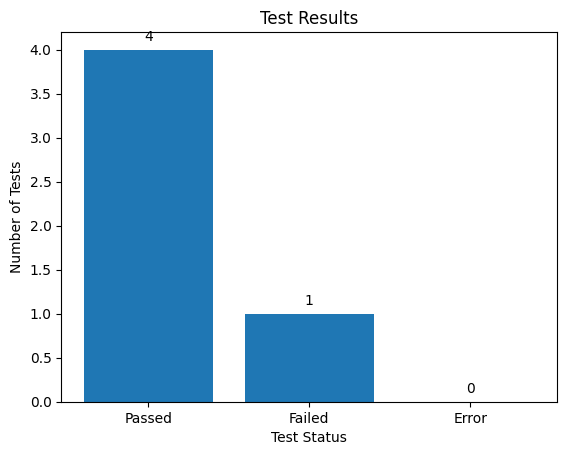

In [2]:
import matplotlib.pyplot as plt

# Data
categories = ['Passed', 'Failed', 'Error']
values = [4, 1, 0]

# Create a bar plot
plt.bar(categories, values)

# Add labels to the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.1, str(value), ha='center')

# Set plot title and axis labels
plt.title('Test Results')
plt.xlabel('Test Status')
plt.ylabel('Number of Tests')

# Show the plot
plt.show()